Found 511 images belonging to 32 classes.
Found 126 images belonging to 32 classes.
Epoch 1/10


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 256s 12s/step - accuracy: 0.1314 - loss: 3.6104 - val_accuracy: 0.6354 - val_loss: 1.8335
Epoch 2/10
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:27 6s/step - accuracy: 0.5312 - loss: 1.7453

C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 727ms/step - accuracy: 0.5312 - loss: 0.9308 - val_accuracy: 0.6333 - val_loss: 0.9720
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 230s 12s/step - accuracy: 0.6113 - loss: 1.3996 - val_accuracy: 0.7292 - val_loss: 1.0554
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 836ms/step - accuracy: 0.7188 - loss: 0.6257 - val_accuracy: 0.8333 - val_loss: 0.4645
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 342s 18s/step - accuracy: 0.8276 - loss: 0.6490 - val_accuracy: 0.8438 - val_loss: 0.7105
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 879ms/step - accuracy: 0.9062 - loss: 0.2096 - val_accuracy: 0.9333 - val_loss: 0.3136
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 299s 17s/step - accuracy: 0.9321 - loss: 0.3513 - val_accuracy: 0.8958 - val_loss: 0.3915
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8438 - loss: 0.2252 - val_accuracy: 0.7667 - val_loss: 0.3333
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 275s 13s/step - accuracy: 0.9150 - loss: 0.3313 - val_accuracy: 0.9479 - val

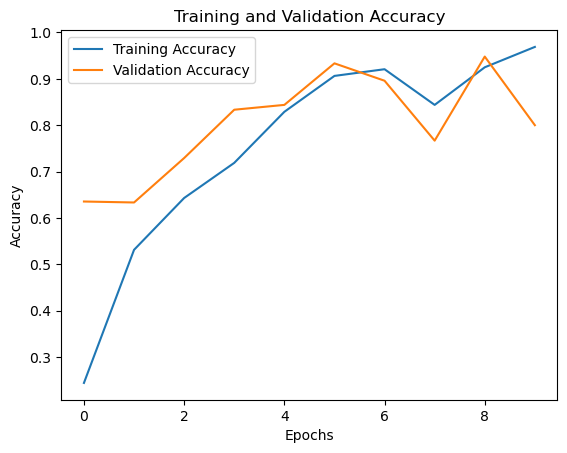

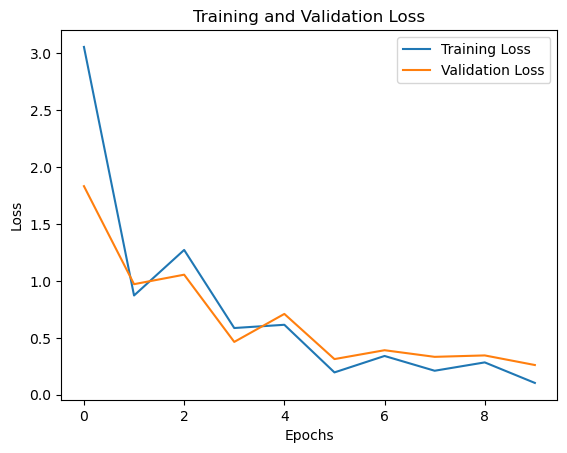

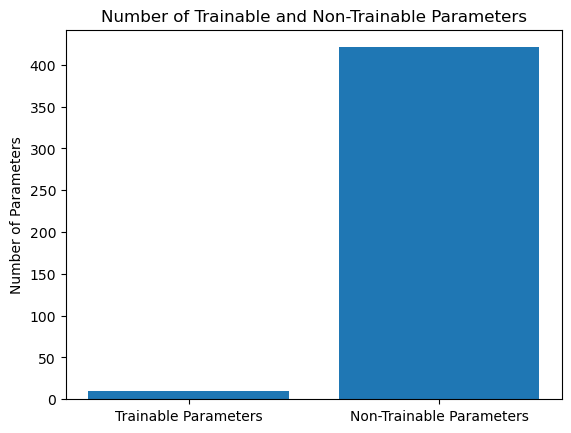

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set up data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define directories for train, validation, and test sets
train_dir = 'D:/FolioList/Folio Leaf Dataset/Folio/'
validation_dir = 'D:/FolioList/Folio Leaf Dataset/Folio/'
test_dir = 'D:/FolioList/Folio Leaf Dataset/Folio/'

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load DenseNet121 base model
base_model_densenet = DenseNet121(weights='imagenet', include_top=False)

# Add custom classification head with dropout
x = base_model_densenet.output
x = GlobalAveragePooling2D()(x) 
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout regularization
predictions_densenet = Dense(32, activation='softmax')(x)

# Combine base model with custom head
model_densenet = Model(inputs=base_model_densenet.input, outputs=predictions_densenet)

# Fine-tune some layers of the pre-trained DenseNet121 model
for layer in model_densenet.layers[:-10]:
    layer.trainable = False

# Compile the model
model_densenet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_densenet.fit(train_generator,
                             steps_per_epoch=train_generator.samples // train_generator.batch_size,
                             validation_data=validation_generator,
                             validation_steps=validation_generator.samples // validation_generator.batch_size,
                             epochs=10)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot number of trainable parameters
trainable_params = [layer.trainable for layer in model_densenet.layers]
num_trainable_params = sum(trainable_params)
num_not_trainable_params = len(trainable_params) - num_trainable_params
plt.bar(['Trainable Parameters', 'Non-Trainable Parameters'], [num_trainable_params, num_not_trainable_params])
plt.title('Number of Trainable and Non-Trainable Parameters')
plt.ylabel('Number of Parameters')
plt.show()
